## Understanding Expected Utility

### David Ngo

----

#### Risk aversion as curvature of the felicity function.

Draw a stacked graph showing the coefficient of relative risk aversion for this array: R = [0, 0.25, 0.5, 1, 2, 4].  Let the wealth axis vary from 1 to 10.

Relative Risk Aversion Formula: $$\frac{-U''(x)*x}{U'(x)}$$

Utility function: $$\frac{C^{1-r}-1}{1-r}\ ,\ r>0$$


In [1]:
# Import packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
from scipy.stats import lognorm

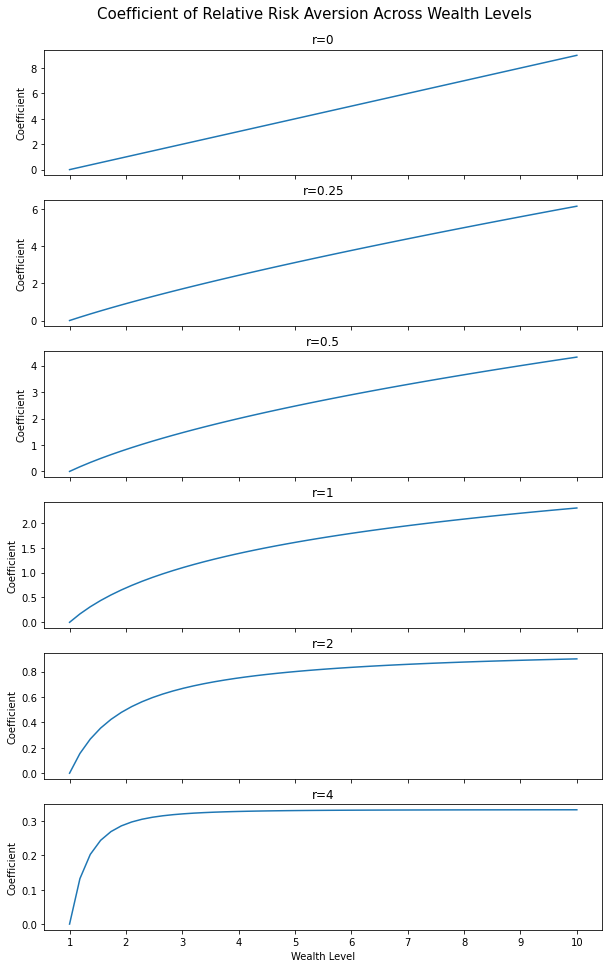

In [2]:
# Felicity function
def felicity(x,rho):
    """
    aka utility function
    rho is the measure of relative risk aversion
    """
    if rho == 1:
        u = np.log(x)
    if rho != 1:
        u = (x**(1 - rho) - 1) / (1 - rho)
    return(u)

# Levels of risk aversion
R = [0, 0.25, 0.5, 1, 2, 4]

# Constants within range of wealth
w=np.linspace(1,10)

# Empty matrix for storing output
U=np.zeros((len(w),len(R)))

# Compute felicity for R
for i in range(len(w)):
    for j in range(len(R)):
        U[i,j] = felicity(w[i],R[j])

# Configure plot labels and size      
fig, axs = plt.subplots(len(R), figsize=(10,15),sharex=True)
fig.suptitle('Coefficient of Relative Risk Aversion Across Wealth Levels', size = 15)
fig.subplots_adjust(top=.94)
plt.xticks(range(len(w)))
plt.setp(axs, ylabel='Coefficient')
plt.xlabel("Wealth Level")

# Display plot
for i in range(len(R)):
    axs[i].set_title("r="+str(R[i]))
    axs[i].plot(w, U[:,i])

----
#### Another or better way of doing it:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
from scipy.stats import lognorm

In [2]:
def u(c,r):
    """
    CRRA class of utility functions
    r is the measure of relative risk aversion
    """
    if r == 1:
        u=np.log(c)
        return u
    u = (c**(1-r) - 1)/(1-r)
    return u

In [3]:
def cert(u,r):
    """
    inverts CRRA class of utility functions
    r is the measure of relative risk aversion
    """
    if r == 1:
        cert=np.exp(u)
        return cert
    cert = (u*(1-r)+1)**(1/(1-r))
    return cert

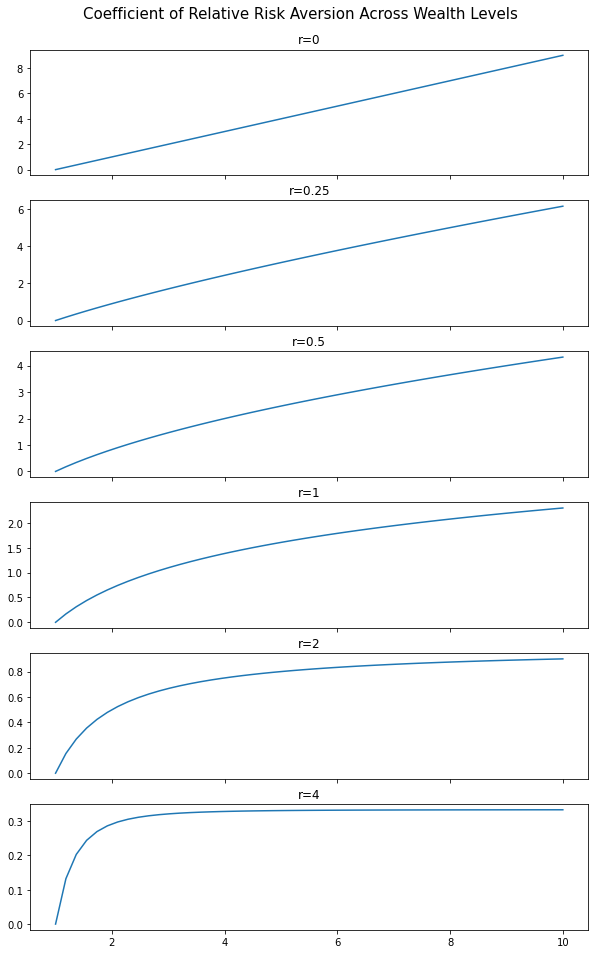

In [7]:
x=np.linspace(1,10)
R = [0, 0.25, 0.5, 1, 2, 4]
n=len(R)
y=[]
for r in R:
    y.append(u(x,r))  
fig, axs = plt.subplots(n, figsize=(10,15),sharex=True)
fig.subplots_adjust(top=.94)
fig.suptitle('Coefficient of Relative Risk Aversion Across Wealth Levels', size = 15)
for i in range(n):
    axs[i].set_title("r="+str(R[i]))
    axs[i].plot(x, y[i])

----

#### Returns on the stock market and the risk premium

The real annual returns of the S&P500 are  8.4%, with standard deviation of 19.5%.  Assume that the annual returns on the SP500 are normally distributed.  The real rate of return on long-term bonds is 2.2%. These numbers cover annual data from 1928 through 2020.  You can find them [here.](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)

Generate a random time series for one hundred years that has those properties.  Let the starting value be 3900.  Graph the logarithm of the time series you have generated.

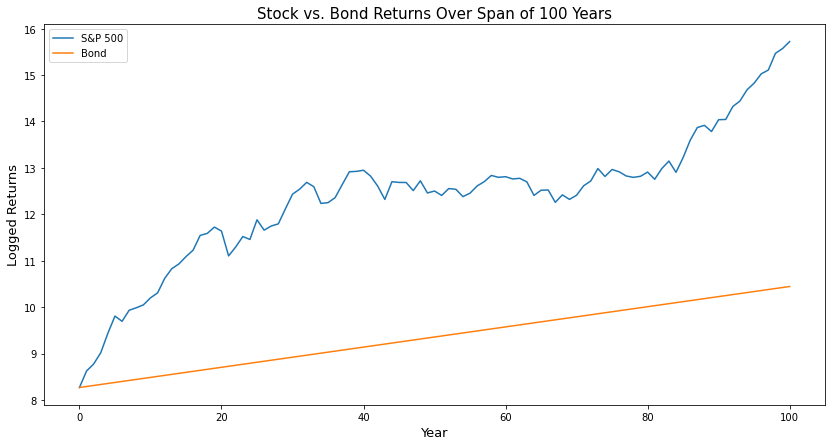

In [3]:
# Set seed
np.random.seed(0)

# Time period
T= 100

# S&P500 mean returns rate
mu=.084

# S&P500 standard deviation
sigma=.195

# Normally distribution of returns rates
returns = np.random.normal(mu,sigma,T)

# Starting value
sv = 3900

# Initial array of stocks 
stocks = [sv]

# Stock values for T periods using returns
for i in range(T):
    next_returns = sv * (1+returns[i])
    stocks.append(next_returns)
    sv = next_returns
    
# Log value of stocks
log_stock=np.log(stocks)

# Initial array of stocks
sv = 3900

# Long-term bonds
long = .022

# Initial array of bonds
bonds = [sv]

# Bonds values for T periods using returns
for i in range(T):
    next_returns = sv * (1.022) 
    bonds.append(next_returns)
    sv = next_returns
    
#log value of bonds
log_bond=np.log(bonds)

# Create plot
plt.figure(figsize=(14, 7))
plt.plot(log_stock, label="S&P 500")
plt.plot(log_bond, label="Bond")

# Configure plot labels and size   
plt.xlabel('Year', fontsize=13)
plt.ylabel("Logged Returns", fontsize=13)
plt.title("Stock vs. Bond Returns Over Span of 100 Years", size = 15)

# Display plot
plt.legend()
plt.show()

####  Risk aversion and the risk premium

You will need to use scipy.stats.lognorm and also scipy.integrate.quad to answer the next question. Let utility exhibit CRRA. What risk aversion coefficient would explain the risk premium? Here's how to answer this question.  First, calculate the expected utility of a log-normally distributed random variable.  Look closely at the documentation in scipy.lognormal to see how to parametrize it correctly. Second, check the certainty equivalent of that expected utility. Plot your parameterization to show that you have down it correctly; it should look like the following picture. Third, monkey around with coefficient of relative risk aversion until the certainty equivalent is 1.022. Hint: if the random variable $X$ is log-normally distributed, then $Y = ln(X)$ has a normal distribution.

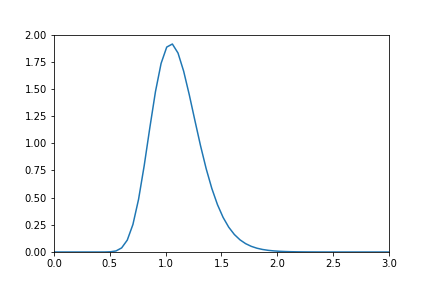

##### Note: I received a lot of help from Laniah in understanding this problem





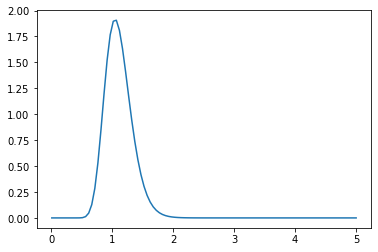

From integrating, the expected utility is 0.021050311408396728 and the possible error is 1.8047961859810752e-09 .
Given that the level of risk arversion equals, 4.271 , we find that the certainty equivalent equals, 1.0220497 . This tells us that a person with a risk aversion of 4.271 would need a guaranteed gross payoff of 1.0220497 (an estimated 2.2 % return) to choose a bond over a stock; the person is extremely risk averse towards buying stocks over bonds,   since stocks involve more risk. We can infer that as risk aversion increases, the certainty equivalent decreases.


In [4]:
import warnings
warnings.filterwarnings("ignore")

def u(c,r):
    """
    CRRA class of utility functions
    r is the measure of relative risk aversion
    """
    if r == 1:
        u=np.log(c)
        return u
    u = (c**(1-r) - 1)/(1-r)
    return u

def cert(u,r):
    """
    inverts CRRA class of utility functions
    r is the measure of relative risk aversion
    """
    if r == 1:
        cert=np.exp(u)
        return cert
    cert = (u*(1-r)+1)**(1/(1-r))
    return cert

# risk aversion
r=4.271


mu=.084
sigma=.195
x = np.linspace(.01, 5, 100)
y=lognorm.pdf(x, s=sigma, scale = np.exp(mu))

# Plot and display
plt.plot(x,y)
plt.show()

# Utility at each point
utility=u(y,r)

# Expected utility and possible error
results = integrate.quad(lambda x: u(x,r)*lognorm.pdf(x, s=sigma, scale = np.exp(mu)),.1,10)

# Certainty equivalent
certainty_equiv=cert(results[0],r)

print("From integrating, the expected utility is", results[0],
      "and the possible error is", results[1], ".")
print("Given that the level of risk arversion equals,", r, ", we find that the certainty equivalent equals,", 
      round(certainty_equiv,7), ". This tells us that a person with a risk aversion of", r, 
      "would need a guaranteed gross payoff of", round(certainty_equiv,7), "(an estimated", 
      round((certainty_equiv-1)*100, 2), "% return) to choose a bond over a stock; the person is extremely risk averse towards buying stocks over bonds,   since stocks involve more risk. We can infer that as risk aversion increases, the certainty equivalent decreases.")
